In [19]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv("Covid19 Vaccinations.csv", sep=",")
df.head(10)

,month,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster
0,2020-12-01,East Liberty (Pittsburgh),174,1,0
1,2020-12-01,Greenfield (Pittsburgh),214,1,0
2,2020-12-01,Morningside (Pittsburgh),105,1,0
3,2020-12-01,Richland,212,1,0
4,2020-12-01,South Oakland (Pittsburgh),57,1,0
5,2020-12-01,Upper Saint Clair,458,1,0
6,2021-01-01,Baldwin Township,147,64,0
7,2021-01-01,Beechview (Pittsburgh),388,147,0
8,2021-01-01,Bell Acres,85,51,0
9,2021-01-01,Bellevue,480,160,0


First lets get rid of the month tab, because we don't need it. We will just add together all the values for each city from each month.

In [20]:
df =  df.drop(labels="month", axis=1)
df.head(10)

,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster
0,East Liberty (Pittsburgh),174,1,0
1,Greenfield (Pittsburgh),214,1,0
2,Morningside (Pittsburgh),105,1,0
3,Richland,212,1,0
4,South Oakland (Pittsburgh),57,1,0
5,Upper Saint Clair,458,1,0
6,Baldwin Township,147,64,0
7,Beechview (Pittsburgh),388,147,0
8,Bell Acres,85,51,0
9,Bellevue,480,160,0


Next, because this is a dataset of all of Allegheny we want to only get the neighborhoods with Pittsburgh listed in parentheses. 

In [21]:
for index, row in df.iterrows():
    if 'Pittsburgh' not in  row['neighborhood_municipality']:
        df = df.drop(index)
df.head(10)


,neighborhood_municipality,total_partially_vaccinated,total_fully_vaccinated,total_fully_vaccinated_w_booster
0,East Liberty (Pittsburgh),174,1,0
1,Greenfield (Pittsburgh),214,1,0
2,Morningside (Pittsburgh),105,1,0
4,South Oakland (Pittsburgh),57,1,0
7,Beechview (Pittsburgh),388,147,0
13,Central Northside (Pittsburgh),225,97,0
14,Central Oakland (Pittsburgh),313,110,0
16,East Liberty (Pittsburgh),428,214,0
17,Esplen (Pittsburgh),8,2,0
20,Garfield (Pittsburgh),175,92,0


Now that we have only the data we want in our dataframe, lets sort it to give each neighborhood a value. 

The three values are partially vaccinated, fully vaccinated, and fully vaccinated with a booster.

We can assign these values with 1, 1.5, and 2, the more vaccinations the safer!

We can start by totalling this value with a multiplier, and adding them to a dictionary. We can also remove the 
' (Pittsburgh)' in the name to make our data look cleaner.


In [22]:
df = df.apply(lambda x: x.replace({' \(Pittsburgh\)':''},regex=True))
values = {}
for index, row in df.iterrows():
    if row['neighborhood_municipality'] in values:
        part = row['total_partially_vaccinated']*1
        full = row['total_fully_vaccinated']*1.5
        boost = row['total_fully_vaccinated_w_booster']*2
        values[row['neighborhood_municipality']] = values[row['neighborhood_municipality']] + (part+full+boost)
    else:
        part = row['total_partially_vaccinated']*1
        full = row['total_fully_vaccinated']*1.5
        boost = row['total_fully_vaccinated_w_booster']*2
        values[row['neighborhood_municipality']] = (part+full+boost)
values


{'East Liberty': 14361.0,
 'Greenfield': 20130.5,
 'Morningside': 9216.5,
 'South Oakland': 7051.5,
 'Beechview': 17508.0,
 'Central Northside': 7734.5,
 'Central Oakland': 8383.0,
 'Esplen': 435.0,
 'Garfield': 7992.0,
 'Hays': 707.5,
 'Homewood North': 4092.5,
 'Homewood West': 1150.0,
 'Knoxville': 5760.5,
 'Lincoln-Lemington-Belmar': 7327.5,
 'Marshall-Shadeland': 7223.5,
 'Mt. Oliver': 831.0,
 'New Homestead': 2206.0,
 'North Oakland': 16393.5,
 'Point Breeze': 17654.0,
 'Shadyside': 41176.0,
 'Southside Slopes': 9303.5,
 'St. Clair': 404.5,
 'Banksville': 10766.5,
 'Brighton Heights': 16574.0,
 'Central Business District': 12703.5,
 'Central Lawrenceville': 13391.5,
 'Duquesne Heights': 6322.5,
 'East Allegheny': 4576.0,
 'Fairywood': 2347.0,
 'Fineview': 2083.5,
 'Northview Heights': 1600.0,
 'Ridgemont': 1173.0,
 'Squirrel Hill North': 27880.5,
 'Squirrel Hill South': 46909.5,
 'Stanton Heights': 12684.0,
 'Strip District': 5342.0,
 'West End': 448.0,
 'Allegheny West': 1389.0,

We now have all of our Pittsburgh neighborhoods and their point values in terms of vaccinations. Let's convert it into a dataframe and sort it by the highest points.

In [23]:
newList = list(values.items())
new = pd.DataFrame (newList, columns = ['City','Vax Points']) 
new = new.sort_values(by=['Vax Points'], ascending=False)
new

,City,Vax Points
33,Squirrel Hill South,46909.5
19,Shadyside,41176.0
78,Brookline,32014.5
32,Squirrel Hill North,27880.5
68,Bloomfield,23722.5
...,...,...
7,Esplen,435.0
21,St. Clair,404.5
38,Arlington Heights,280.5
62,Undefined,141.5


Let's now make a graph of our data.

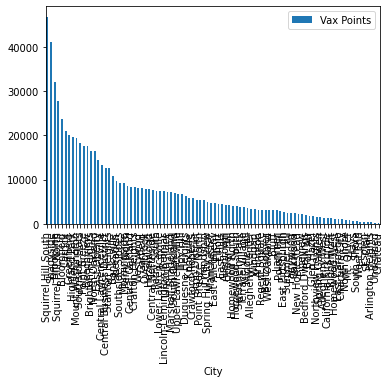

In [24]:
new.plot(x='City', y='Vax Points', kind='bar')	

To make our data clearer and see the most protected cities, we can plot just the cities with the highest points. 

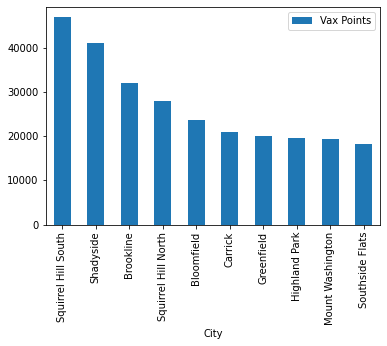

In [25]:
new.head(10).plot(x='City', y='Vax Points', kind='bar')	

In conclusion, the most protected neighborhoods from Covid19 in Pittsburgh are the ten we see listed above, with a big emphasis on Squirel Hill South and Shadyside being outliers on the higher side. 